In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional for prettier plots
sns.set(style="whitegrid")


In [3]:
# Load the dataset
df = pd.read_csv(r"C:\Users\payas\Downloads\educational_dataset_india_5000.csv")

In [4]:
# STEP 3: Clean Column Names
# Convert column names to lowercase and replace spaces with underscores
df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')

print("Cleaned column names:")
print(df.columns.tolist())


Cleaned column names:
['student_id', 'student_name', 'age', 'gender', 'state/city', 'school/institution_name', 'education_level', 'stream/field_of_study', 'marks_percentage', 'no._of_students_in_class', 'scholarship_status']


In [ ]:
# Convert Columns to Categorical (Optional but useful)

In [5]:
# Define possible categorical columns
categorical_columns = [
    'gender', 
    'state/city', 
    'school/institution_name',
    'education_level', 
    'stream/field_of_study', 
    'scholarship_status'
]

# Convert safely
for col in categorical_columns:
    if col in df.columns:
        df[col] = df[col].astype('category')

# Check updated data types
print("📦 Data types updated:")
print(df.dtypes)


📦 Data types updated:
student_id                    object
student_name                  object
age                          float64
gender                      category
state/city                  category
school/institution_name     category
education_level             category
stream/field_of_study       category
marks_percentage             float64
no._of_students_in_class       int64
scholarship_status          category
dtype: object


In [ ]:
# STEP : Basic Cleaning — Fill or Drop (optional, your choice)

In [6]:
# Example: Fill missing numerical column with mean
if 'marks_percentage' in df.columns:
    df['marks_percentage'] = df['marks_percentage'].fillna(df['marks_percentage'].mean())

# Example: Fill missing categorical column with mode
if 'gender' in df.columns:
    df['gender'] = df['gender'].fillna(df['gender'].mode()[0])


In [7]:
df

,student_id,student_name,age,gender,state/city,school/institution_name,education_level,stream/field_of_study,marks_percentage,no._of_students_in_class,scholarship_status
0,SID1,Aryan,8.0,Male,Lucknow,School_85,Postgraduate,Arts,75.33,27,No
1,SID2,Priya,19.0,Mle,Delhi,School_99,Secondary,NaN,52.00,55,Yes
2,SID3,Priya,19.0,Others,Pune,School_91,Higher Secondary,Science,37.96,20,No
3,SID4,Aryan,6.0,Female,Bangalore,School_87,Primary,NaN,45.39,31,No
4,SID5,Pooja,9.0,Female,Lucknow,School_74,Undergraduate,Science,50.53,28,Yes
...,...,...,...,...,...,...,...,...,...,...,...
4995,SID4996,Priya,9.0,Female,Kolkata,School_94,Secondary,NaN,89.12,30,Yes
4996,SID4997,Neha,16.0,Others,Pune,School_68,Postgraduate,Science,40.64,52,Yes
4997,SID4998,Karan,8.0,Female,Kolkata,School_61,Higher Secondary,Commerce,70.25,59,No
4998,SID4999,Priya,19.0,Female,Lucknow,School_86,Undergraduate,Engineering,78.45,47,No


In [ ]:
# EDA visuals with Outlier detection

In [ ]:
# Univariate Analysis
# Numeric Feature: marks_percentage

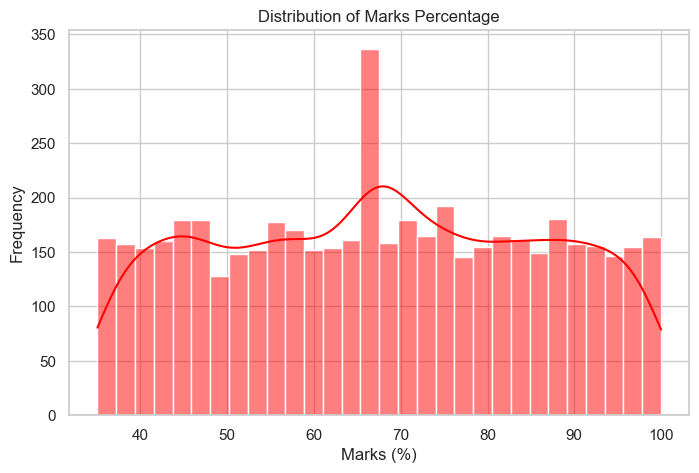

In [9]:
# Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['marks_percentage'], kde=True, bins=30, color='red')
plt.title('Distribution of Marks Percentage')
plt.xlabel('Marks (%)')
plt.ylabel('Frequency')
plt.show()


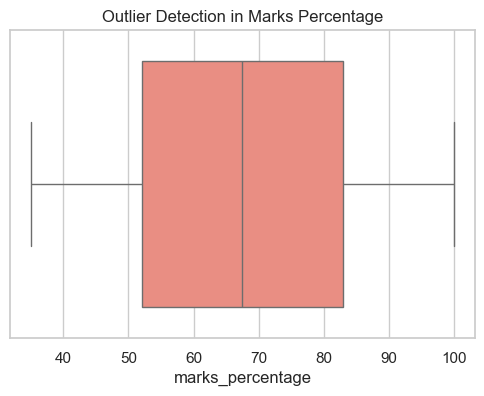

In [10]:
# Boxplot for Outlier Detection

plt.figure(figsize=(6, 4))
sns.boxplot(x=df['marks_percentage'], color='salmon')
plt.title('Outlier Detection in Marks Percentage')
plt.show()


In [11]:
# Detect actual outliers (IQR method)
Q1 = df['marks_percentage'].quantile(0.25)
Q3 = df['marks_percentage'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['marks_percentage'] < lower_bound) | (df['marks_percentage'] > upper_bound)]

print(f"🔎 Number of outliers in marks_percentage: {outliers.shape[0]}")


🔎 Number of outliers in marks_percentage: 0


In [12]:
# Categorical Features – Countplots
# Gender Distribution

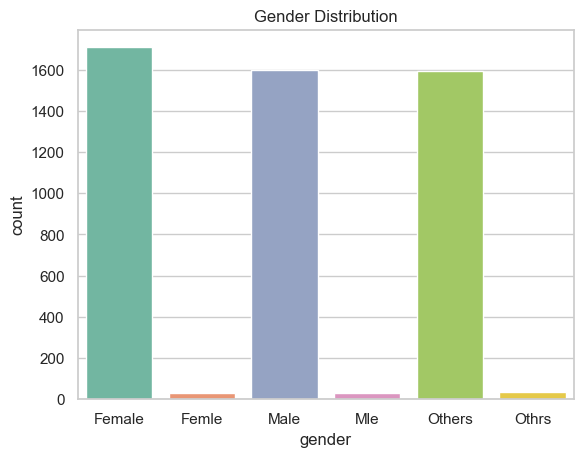

In [16]:
sns.countplot(data=df, x='gender', hue='gender', palette='Set2', legend=False)
plt.title('Gender Distribution')
plt.show()


In [17]:
#Education Level

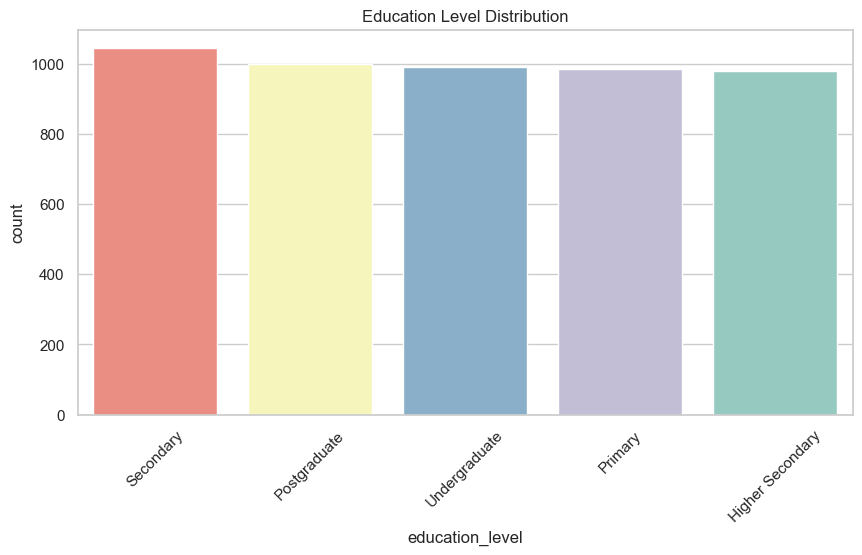

In [19]:
plt.figure(figsize=(10, 5))
sns.countplot(
    data=df, 
    x='education_level', 
    hue='education_level',  # Add this
    palette='Set3', 
    order=df['education_level'].value_counts().index,
    legend=False  # Hide duplicate legend
)
plt.title('Education Level Distribution')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Bivariate Analysis
# Education Level vs. Marks

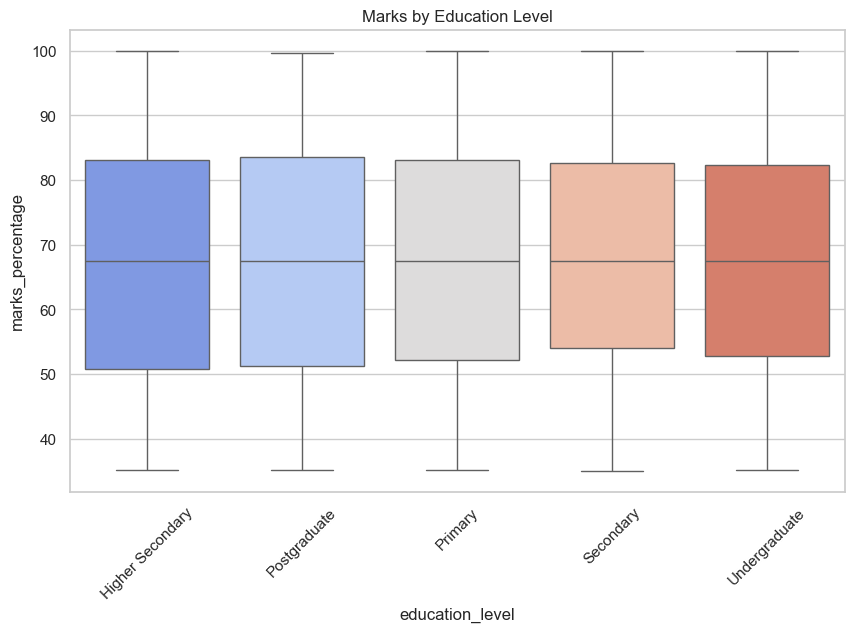

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df, 
    x='education_level', 
    y='marks_percentage', 
    hue='education_level',     # Added to match `palette`
    palette='coolwarm', 
    legend=False               # Hides the duplicate legend
)
plt.title('Marks by Education Level')
plt.xticks(rotation=45)
plt.show()


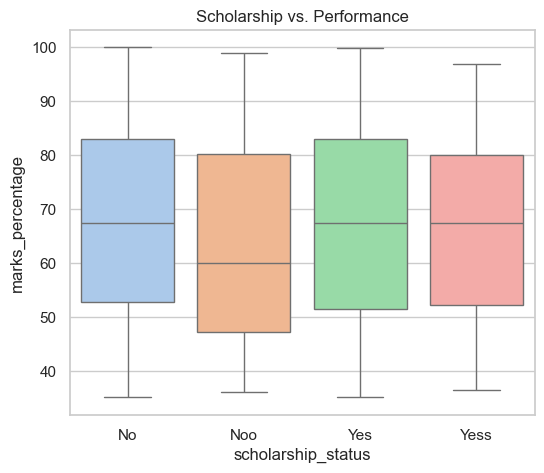

In [23]:
# Scholarship Impact

plt.figure(figsize=(6, 5))
sns.boxplot(
    data=df,
    x='scholarship_status',
    y='marks_percentage',
    hue='scholarship_status',   # <- Important for future compatibility
    palette='pastel',
    legend=False                # <- Avoids duplicate legend
)
plt.title('Scholarship vs. Performance')
plt.show()


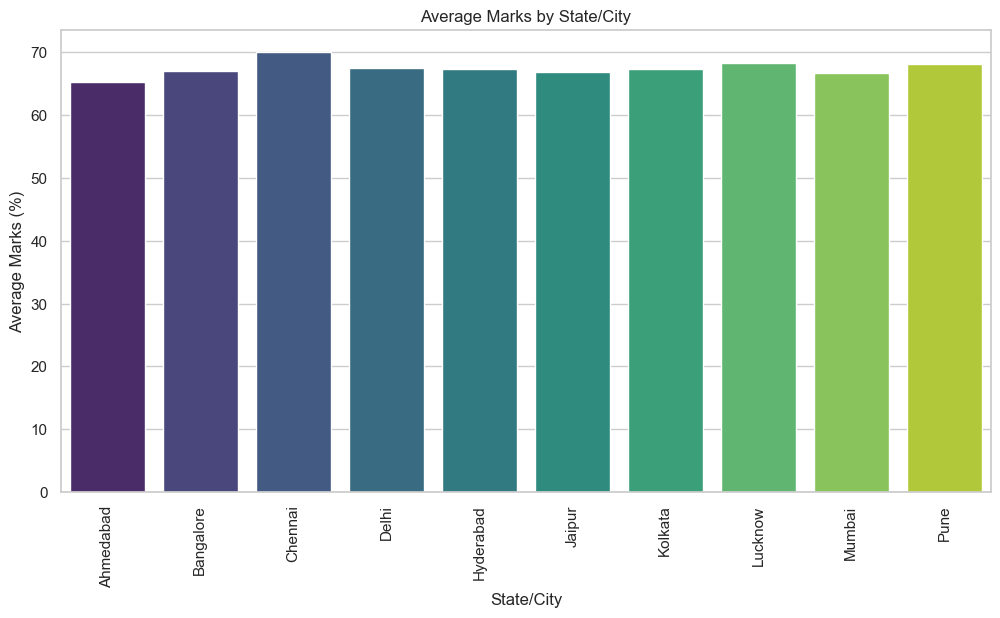

In [25]:
# State-wise Performance
plt.figure(figsize=(12, 6))

# Use a DataFrame instead of Series for better hue assignment
state_df = avg_marks_by_state.reset_index()
state_df.columns = ['state/city', 'avg_marks']

sns.barplot(
    data=state_df,
    x='state/city',
    y='avg_marks',
    hue='state/city',       # Add this
    palette='viridis',
    legend=False
)
plt.xticks(rotation=90)
plt.title('Average Marks by State/City')
plt.ylabel('Average Marks (%)')
plt.xlabel('State/City')
plt.show()



In [ ]:
# Correlation (if more numerical features are available)

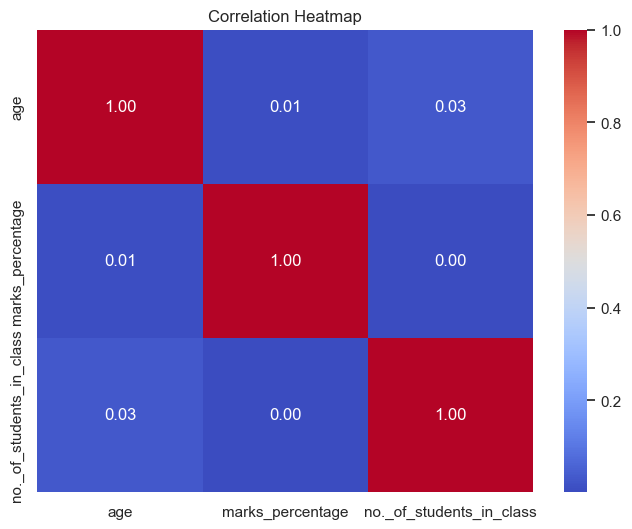

In [26]:
# Only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
